In [2]:
from manim import *
import math
import numpy as np
from manim_slides import *
import random
from MF_Tools import *
import os
os.environ["PATH"] = "/Library/TeX/texbin:" + os.environ["PATH"]

from collections import defaultdict

config.background_color = WHITE 
config.frame_height = 8

/Users/mnica/py_projects/.venv/lib/python3.9/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
/Users/mnica/py_projects/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Manim Community v0.19.0

(0, SingleStringMathTex('\\tilde{H}_4('))
(1, SingleStringMathTex(' x '))
(2, SingleStringMathTex(','))
(3, SingleStringMathTex(' t '))
(4, SingleStringMathTex(') = \\mathbb{E}_{'))
(5, SingleStringMathTex(' Z '))
(6, SingleStringMathTex('\\sim \\mathcal{N}(0,1)} \\Big[ \\Big('))
(7, SingleStringMathTex(' x '))
(8, SingleStringMathTex('+\\imath'))
(9, SingleStringMathTex(' \\sqrt{'))
(10, SingleStringMathTex(' t '))
(11, SingleStringMathTex('}'))
(12, SingleStringMathTex(' Z '))
(13, SingleStringMathTex('\\Big)^4 \\Big] ='))
(14, SingleStringMathTex(' x '))
(15, SingleStringMathTex('^4 - 6'))
(16, SingleStringMathTex(' t '))
(17, SingleStringMathTex(' x '))
(18, SingleStringMathTex('^2 + 3'))
(19, SingleStringMathTex(' t '))
(20, SingleStringMathTex('^2'))


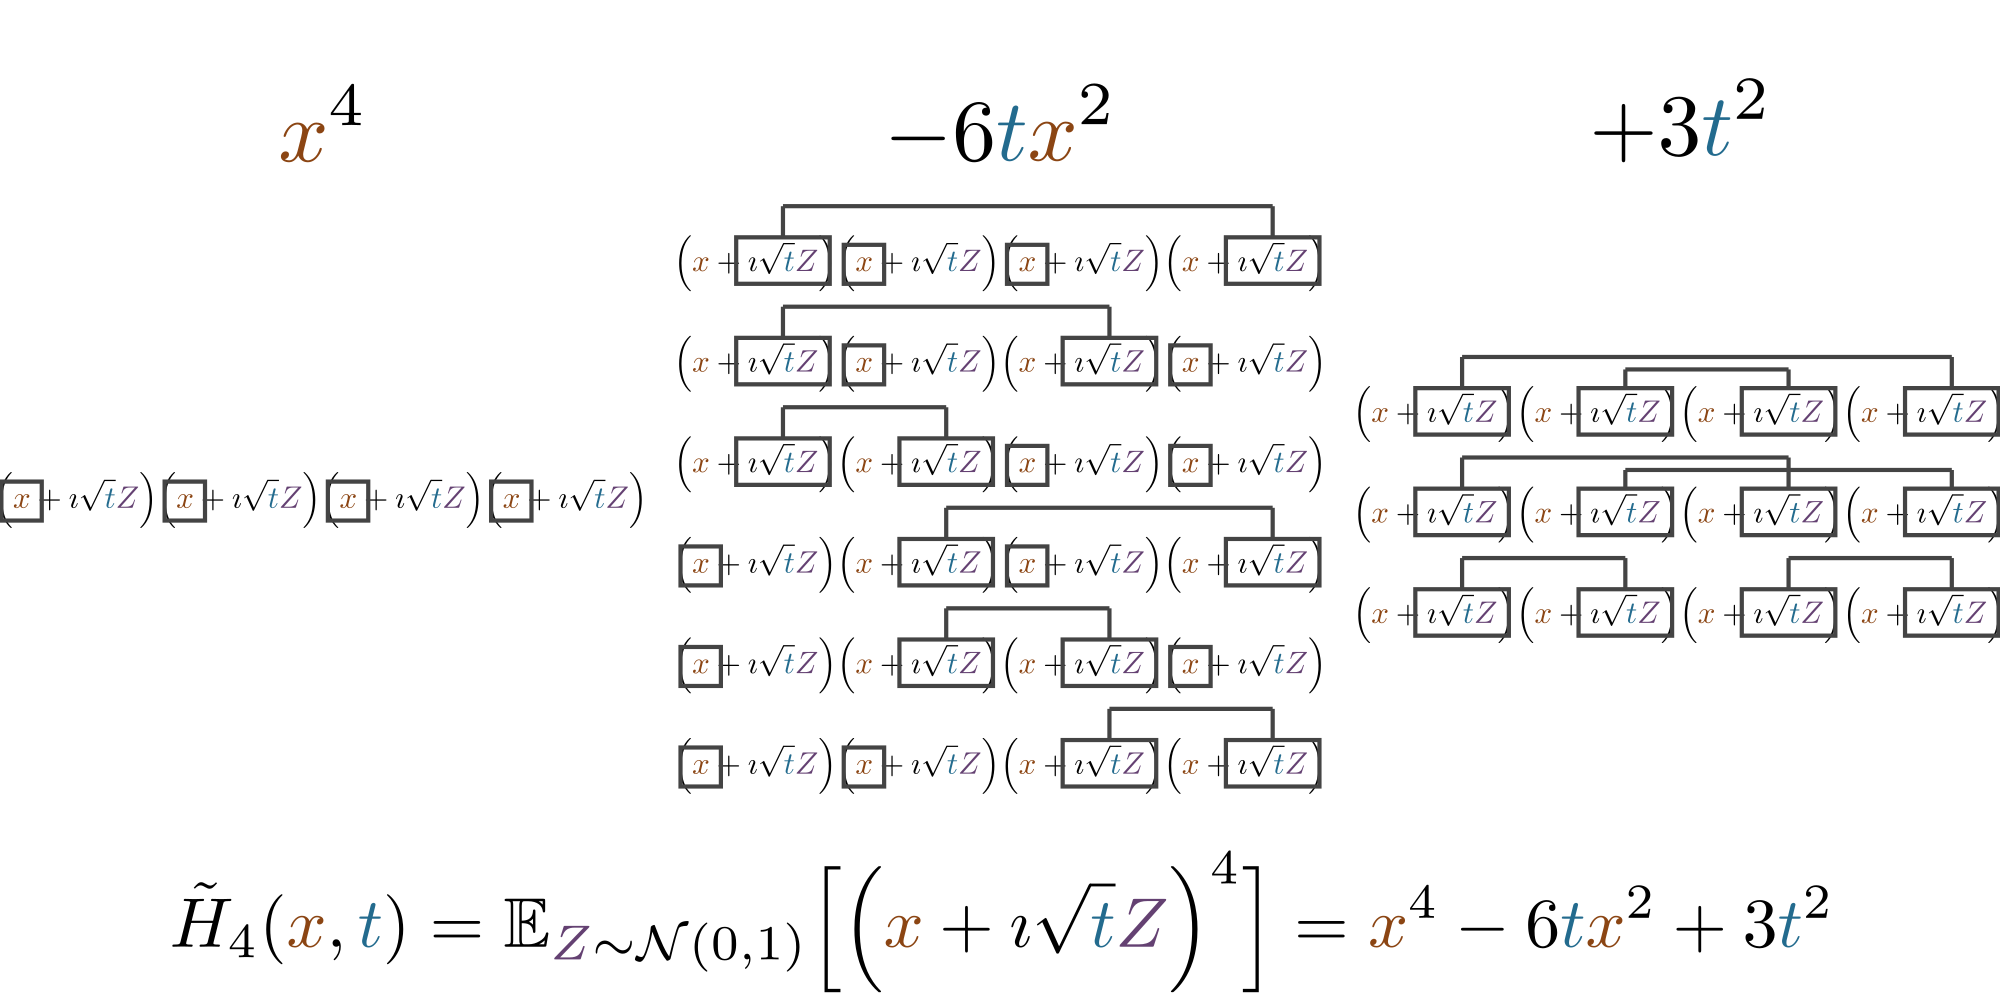

In [170]:
%%manim -r 2000,1000 -v WARNING poly

# -ql

text_color = BLACK
x_color = DARK_BROWN
z_color = PURPLE_E
t_color = BLUE_E
rect_color = GRAY_D
P_COLOR = rect_color
line_stroke_width = 3
rect_stroke_width = 3
fs = 48 #font size
x_rect_buff = 0.2 #.02
x_buff_factor = 2
Z_rect_buff = 0.2
t2cD = {#r"\imath \sqrt{t} Z" : z_color,
    r" t " : t_color,
    r" Z " : z_color,
    r" \imath ": BLACK,
    r" x ": x_color, 
}

def PP_lines(start_mob,end_mob,height=0.5,my_dir=UP): 
    #returns a VGroup of 3 objects, which are the lines for the pair partiions
    #my_dir is either UP or DOWN
    if my_dir[1]>0:#check if my_dir is pointing up or down
        start_pt = start_mob.get_top()
        end_pt = end_mob.get_top()
    else:
        start_pt = start_mob.get_bottom()
        end_pt = end_mob.get_bottom()

    p1 = start_pt + my_dir*height
    p2 = end_pt + my_dir*height
    return VGroup(Line(p1,p2,color=P_COLOR,stroke_width=line_stroke_width),
                  Line(start_pt,p1,color=P_COLOR,stroke_width=line_stroke_width),
                  Line(end_pt,p2,color=P_COLOR,stroke_width=line_stroke_width))

def monomial(pattern = ["x","x",1,1], my_height_dict = {},default_height = 0.5):
    n = len(pattern)
    tex_string = r"\Big( x + \imath \sqrt{ t } Z \Big)"*n
    mob = MathTex(tex_string,font_size=fs,tex_to_color_map=t2cD,color=text_color)
    xs = mob.get_parts_by_tex(" x ")
    itZs = [VGroup(i,t,Z) for i,t,Z in zip(
                        mob.get_parts_by_tex(r" \imath "),
                        mob.get_parts_by_tex(r" t "),
                        mob.get_parts_by_tex(r" Z "))] 

    height_dict = defaultdict(lambda : default_height)
    for key, val in my_height_dict.items():
        height_dict[key] = val


    pattern_mob = VGroup()
    
    ## add in rectangles around the x's
    for ix, item in enumerate(pattern):
        if item == "x":
            rect = SurroundingRectangle(xs[ix],color=rect_color,buff=x_rect_buff,stroke_width=rect_stroke_width)
            #circle = Circle(color=rect_color)
            #circle.surround(xs[ix], buffer_factor=x_buff_factor) #*x_rect_buff)

            pattern_mob.add(rect)

    ## deal with the pairs
    pairs = defaultdict(list)

    for idx, val in enumerate(pattern):
        if val != "x":
            pairs[val].append(idx)  ###a dictionary that stores all the pairs

    # Call PP_lines for each pair
    for key, indices in pairs.items():
        if len(indices) == 2:
            rect_LEFT = SurroundingRectangle(itZs[indices[0]],color=rect_color,buff=Z_rect_buff,stroke_width=rect_stroke_width )
            rect_RIGHT = SurroundingRectangle(itZs[indices[1]],color=rect_color,buff=Z_rect_buff,stroke_width=rect_stroke_width)
            line = PP_lines(rect_LEFT,rect_RIGHT, height = height_dict[key])
            pattern_mob.add(rect_LEFT, rect_RIGHT, line)
        else:
            print(f"Warning: Pattern value with unexpected number of occurrences: {indices}")

    #print(*enumerate(mob),sep='\n')
    return VGroup(mob,pattern_mob)

def pattern_group( patterns_and_heights ):
    allMobs = VGroup()
    for ix in range(len(patterns_and_heights)):
        pattern = patterns_and_heights[ix][0]
        my_height_dict = patterns_and_heights[ix][1]
        ans = monomial(pattern,my_height_dict=my_height_dict)
        allMobs.add(ans)

    allMobs.arrange(DOWN)
    #if allMobs.height > config.frame_height/3:
    #    allMobs.height = config.frame_height/3
    return(allMobs)



class poly(Scene):
    def construct(self):
        patterns_and_heights = [ [ ["x","x","x","x"], {} ]]
        eqn_fs = 60
        eqn_0 = MathTex(r" x ^4",font_size=eqn_fs,tex_to_color_map=t2cD,color=text_color)
        mob_0 = pattern_group(patterns_and_heights)

        patterns_and_heights = [ [ [1,"x","x",1], {} ],
                                 [ [1,"x",1,"x"], {} ],
                                 [ [1,1,"x","x"], {} ],
                                 [ ["x",1,"x",1], {} ],
                                 [ ["x",1,1,"x"], {} ],
                                 [ ["x","x",1,1], {} ],
        ]
        eqn_1 = MathTex(r"-6 t  x ^2",font_size=eqn_fs,tex_to_color_map=t2cD,color=text_color)
        mob_1 = pattern_group(patterns_and_heights)
        #mob_1_first_three = VGroup(mob_1[0],mob_1[1],mob_1[2]).arrange(DOWN)
        #mob_1_first_three.height = config.frame_height/3
        #mob_1_next_three = VGroup(mob_1[3],mob_1[4],mob_1[5]).arrange(DOWN)
        #mob_1_next_three.height = config.frame_height/3
        
        #mob_1_first_three.next_to(mob_1_next_three,RIGHT)
        

        alt_height = 0.3
        patterns_and_heights = [ [ [1,2,2,1], {2:alt_height} ],
                                 [ [1,2,1,2], {2:alt_height} ],
                                 [ [1,1,2,2], {} ],
        ]
        eqn_2 = MathTex(r"+ 3 t ^2",font_size=eqn_fs,tex_to_color_map=t2cD,color=text_color)
        mob_2 = pattern_group(patterns_and_heights)

        all_group = VGroup(mob_0,mob_1,mob_2) #VGroup(mob_1_first_three, mob_1_next_three,mob_2)
        all_group.arrange(RIGHT,buff=0.6)
        all_group.width = config.frame_width
        self.add(all_group)

        
        eqn_0.next_to(mob_0,UP,buff = 2)
        eqn_1.next_to(mob_1,UP).align_to(eqn_0,DOWN)
        eqn_2.next_to(mob_2,UP).align_to(eqn_0,DOWN)
        eqn_group = VGroup(eqn_0,eqn_1,eqn_2)
        eqn_group.to_edge(UP).shift(0.5*DOWN)

        my_hermite = MathTex(r"\tilde{H}_4( x , t ) = \mathbb{E}_{ Z \sim \mathcal{N}(0,1)} \Big[ \Big( x +\imath",r" \sqrt{ t } Z \Big)^4 \Big] = x ^4 - 6 t  x ^2 + 3 t ^2",font_size=48,tex_to_color_map=t2cD,color=text_color).to_edge(DOWN,buff=0).shift(0.5*UP)
        print(*enumerate(my_hermite),sep='\n')
        self.add(eqn_group,my_hermite)

        
        

Manim Community v0.19.0

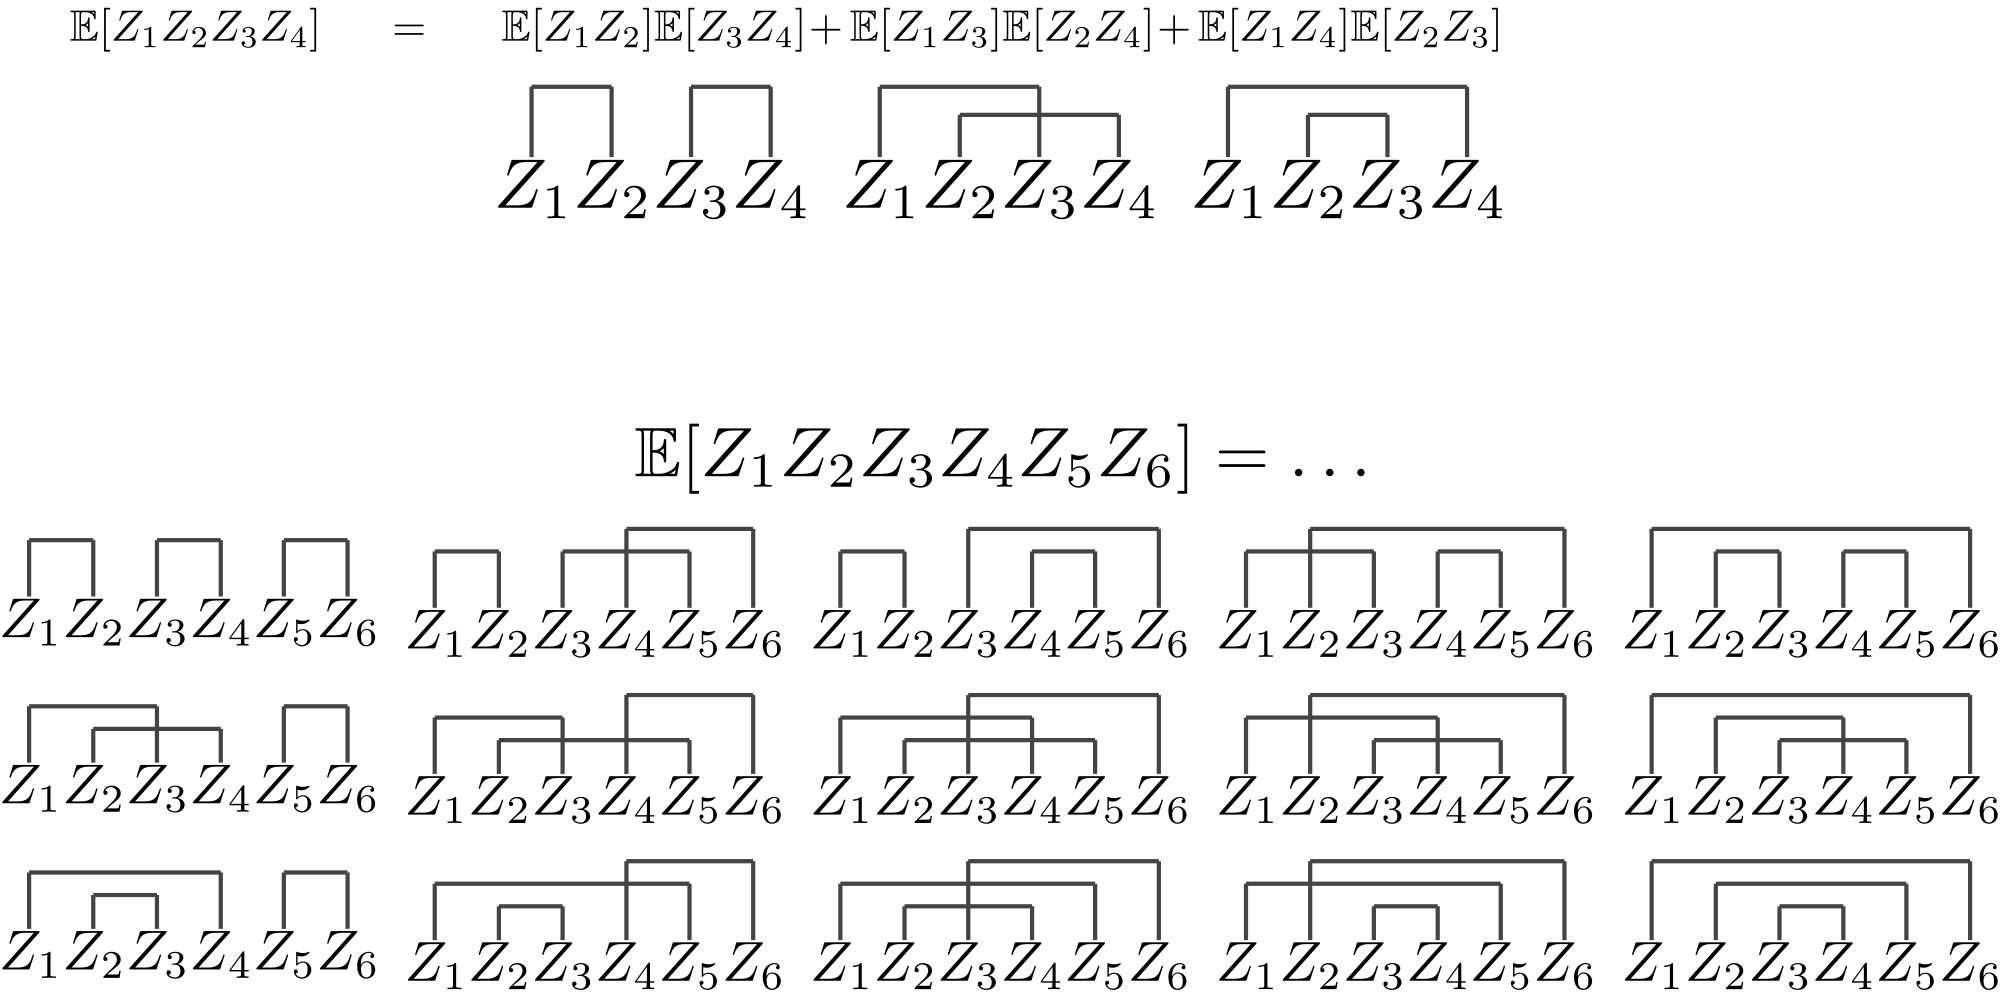

In [237]:
%%manim -r 2000,1000 -v WARNING Wick

def Xmonomial(pattern = ["x","x",1,1], my_height_dict = {},default_height = 0.5):
    n = len(pattern)
    mob = MathTex(*[f"Z_{i}"  for i in range(1,n+1)],font_size=fs,tex_to_color_map=t2cD,color=text_color)
    #print(*enumerate(mob),sep='\n')
    xs = mob
    
    height_dict = defaultdict(lambda : default_height)
    for key, val in my_height_dict.items():
        height_dict[key] = val


    pattern_mob = VGroup()
    
    ## add in rectangles around the x's
    #for ix, item in enumerate(pattern):
    #    if item == "x":
    #        rect = SurroundingRectangle(xs[ix],color=rect_color,buff=x_rect_buff,stroke_width=rect_stroke_width)
            #circle = Circle(color=rect_color)
            #circle.surround(xs[ix], buffer_factor=x_buff_factor) #*x_rect_buff)

    #        pattern_mob.add(rect)

    ## deal with the pairs
    pairs = defaultdict(list)

    for idx, val in enumerate(pattern):
        if val != "x":
            pairs[val].append(idx)  ###a dictionary that stores all the pairs

    # Call PP_lines for each pair
    for key, indices in pairs.items():
        if len(indices) == 2:
            X_rect_buff = 0.02
            rect_stroke_width = 0.0
            rect_LEFT = SurroundingRectangle(xs[indices[0]],color=rect_color,buff=X_rect_buff,stroke_width=rect_stroke_width )
            rect_RIGHT = SurroundingRectangle(xs[indices[1]],color=rect_color,buff=X_rect_buff,stroke_width=rect_stroke_width)
            line = PP_lines(rect_LEFT,rect_RIGHT, height = height_dict[key])
            pattern_mob.add(rect_LEFT, rect_RIGHT, line)
        else:
            print(f"Warning: Pattern value with unexpected number of occurrences: {indices}")

    #print(*enumerate(mob),sep='\n')
    return VGroup(mob,pattern_mob)

def Xpattern_group( patterns_and_heights ):
    allMobs = VGroup()
    for ix in range(len(patterns_and_heights)):
        pattern = patterns_and_heights[ix][0]
        my_height_dict = patterns_and_heights[ix][1]
        ans = Xmonomial(pattern,my_height_dict=my_height_dict)
        allMobs.add(ans)

    allMobs.arrange(DOWN)
    #if allMobs.height > config.frame_height/3:
    #    allMobs.height = config.frame_height/3
    return(allMobs)

class Wick(Scene):
    def construct(self):
        
        alt_height = 0.3
        patterns_and_heights = [ [ [1,1,2,2], {} ],
                                 [ [1,2,1,2], {2:alt_height} ],
                                 [ [1,2,2,1], {2:alt_height} ],
                                 
        ]
        my_fs = 30
        eqn_LHS = MathTex(r" \mathbb{E}[Z_1 Z_2 Z_3 Z_4]",font_size=my_fs,tex_to_color_map=t2cD,color=text_color)
        eq = MathTex(r"=",font_size=my_fs,tex_to_color_map=t2cD,color=text_color)
        eqn_1 = MathTex(r"\mathbb{E}[Z_1 Z_2] \mathbb{E}[Z_3 Z_4]",font_size=my_fs,tex_to_color_map=t2cD,color=text_color)
        plus_a = MathTex(r"+",font_size=my_fs,tex_to_color_map=t2cD,color=text_color)
        eqn_2 = MathTex(r"\mathbb{E}[Z_1 Z_3] \mathbb{E}[Z_2 Z_4]",font_size=my_fs,tex_to_color_map=t2cD,color=text_color)
        plus_b = MathTex(r"+",font_size=my_fs,tex_to_color_map=t2cD,color=text_color)
        eqn_3 = MathTex(r"\mathbb{E}[Z_1 Z_4] \mathbb{E}[Z_2 Z_3]",font_size=my_fs,tex_to_color_map=t2cD,color=text_color)
        eqn_LHS.to_corner(UL)
        #eqn_1.width = config.frame_width
        #eqn_1.to_edge(UP)
        mob_1 = Xpattern_group(patterns_and_heights).arrange(RIGHT)
        mob_1.next_to(eqn_LHS,DOWN)
        mob_1.set_x(0)

        eqn_1.next_to(mob_1[0],UP)
        eqn_2.next_to(mob_1[1],UP)
        eqn_3.next_to(mob_1[2],UP)

        plus_a.next_to(eqn_LHS,RIGHT)
        plus_b.next_to(eqn_LHS,RIGHT)
        eq.next_to(eqn_LHS,RIGHT)
        
        eq.set_x(0.5*(eqn_LHS.get_right()[0] + eqn_1.get_left()[0]) )
        plus_a.set_x(0.5*(eqn_1.get_right()[0] + eqn_2.get_left()[0]) )
        plus_b.set_x(0.5*(eqn_2.get_right()[0] + eqn_3.get_left()[0]) )
        
        
        self.add(mob_1,eqn_1,eqn_2,eqn_3,eqn_LHS,plus_a,plus_b,eq)

        alt_height = 0.3
        alt_height_2 = 0.7
        patterns_and_heights = [ [ [1,2,2,1,3,3], {2:alt_height} ],
                                 [ [1,2,1,2,3,3], {2:alt_height} ],
                                 [ [1,1,2,2,3,3], {} ],

                                 [ [1,2,2,3,1,3], {2:alt_height, 3:alt_height_2} ],
                                 [ [1,2,1,3,2,3], {2:alt_height, 3:alt_height_2} ],
                                 [ [1,1,2,3,2,3], {3:alt_height_2} ],   

                                 [ [1,2,3,2,1,3], {2:alt_height, 3:alt_height_2} ],
                                 [ [1,2,3,1,2,3], {2:alt_height, 3:alt_height_2} ],
                                 [ [1,1,3,2,2,3], {3:alt_height_2} ],   

                                 [ [1,3,2,2,1,3], {2:alt_height, 3:alt_height_2} ],
                                 [ [1,3,2,1,2,3], {2:alt_height, 3:alt_height_2} ],
                                 [ [1,3,1,2,2,3], {3:alt_height_2} ],   

                                 [ [3,1,2,2,1,3], {2:alt_height, 3:alt_height_2} ],
                                 [ [3,1,2,1,2,3], {2:alt_height, 3:alt_height_2} ],
                                 [ [3,1,1,2,2,3], {3:alt_height_2} ],   



        ]
        mob_2 = Xpattern_group(patterns_and_heights).arrange(RIGHT)
        
        row_0 = VGroup(*[mob_2[i] for i in range(len(patterns_and_heights)) if i%3 == 0]).arrange(RIGHT)
        row_1 = VGroup(*[mob_2[i] for i in range(len(patterns_and_heights)) if i%3 == 1]).arrange(RIGHT)
        row_2 = VGroup(*[mob_2[i] for i in range(len(patterns_and_heights)) if i%3 == 2]).arrange(RIGHT)
        
        for mob in [row_0, row_1, row_2]:
            mob.width = config.frame_width
        row_group = VGroup(row_2, row_1, row_0).arrange(DOWN)
        row_group.to_edge(DOWN)
        self.add(row_group)
        eqn = MathTex("\mathbb{E}[Z_1 Z_2 Z_3 Z_4 Z_5 Z_6] = \ldots",font_size=48,color=text_color)
        #self.add(eqn)
        eqn.next_to(row_group,UP)
        self.add(eqn)



{' t ': ManimColor('#236B8E'), ' Z ': ManimColor('#644172'), ' L ': ManimColor('#CF5044'), ' R ': ManimColor('#236B8E'), ' \\imath ': ManimColor('#000000'), ' x ': ManimColor('#8B4513'), ' X ': ManimColor('#8B4513')}


Manim Community v0.19.0

\Big( X + \imath  L  \Big) \Big( X + \imath  L  \Big) \Big( X + \imath  L  \Big) \Big( X + \imath  R  \Big) \Big( X + \imath  R  \Big) \Big( X + \imath  R  \Big)
(0, SingleStringMathTex('\\Big('))
(1, SingleStringMathTex(' X '))
(2, SingleStringMathTex('+'))
(3, SingleStringMathTex(' \\imath '))
(4, SingleStringMathTex(' L '))
(5, SingleStringMathTex(' \\Big) \\Big('))
(6, SingleStringMathTex(' X '))
(7, SingleStringMathTex('+'))
(8, SingleStringMathTex(' \\imath '))
(9, SingleStringMathTex(' L '))
(10, SingleStringMathTex(' \\Big) \\Big('))
(11, SingleStringMathTex(' X '))
(12, SingleStringMathTex('+'))
(13, SingleStringMathTex(' \\imath '))
(14, SingleStringMathTex(' L '))
(15, SingleStringMathTex(' \\Big) \\Big('))
(16, SingleStringMathTex(' X '))
(17, SingleStringMathTex('+'))
(18, SingleStringMathTex(' \\imath '))
(19, SingleStringMathTex(' R '))
(20, SingleStringMathTex(' \\Big) \\Big('))
(21, SingleStringMathTex(' X '))
(22, SingleStringMathTex('+'))
(23, SingleStringMathTex(' \

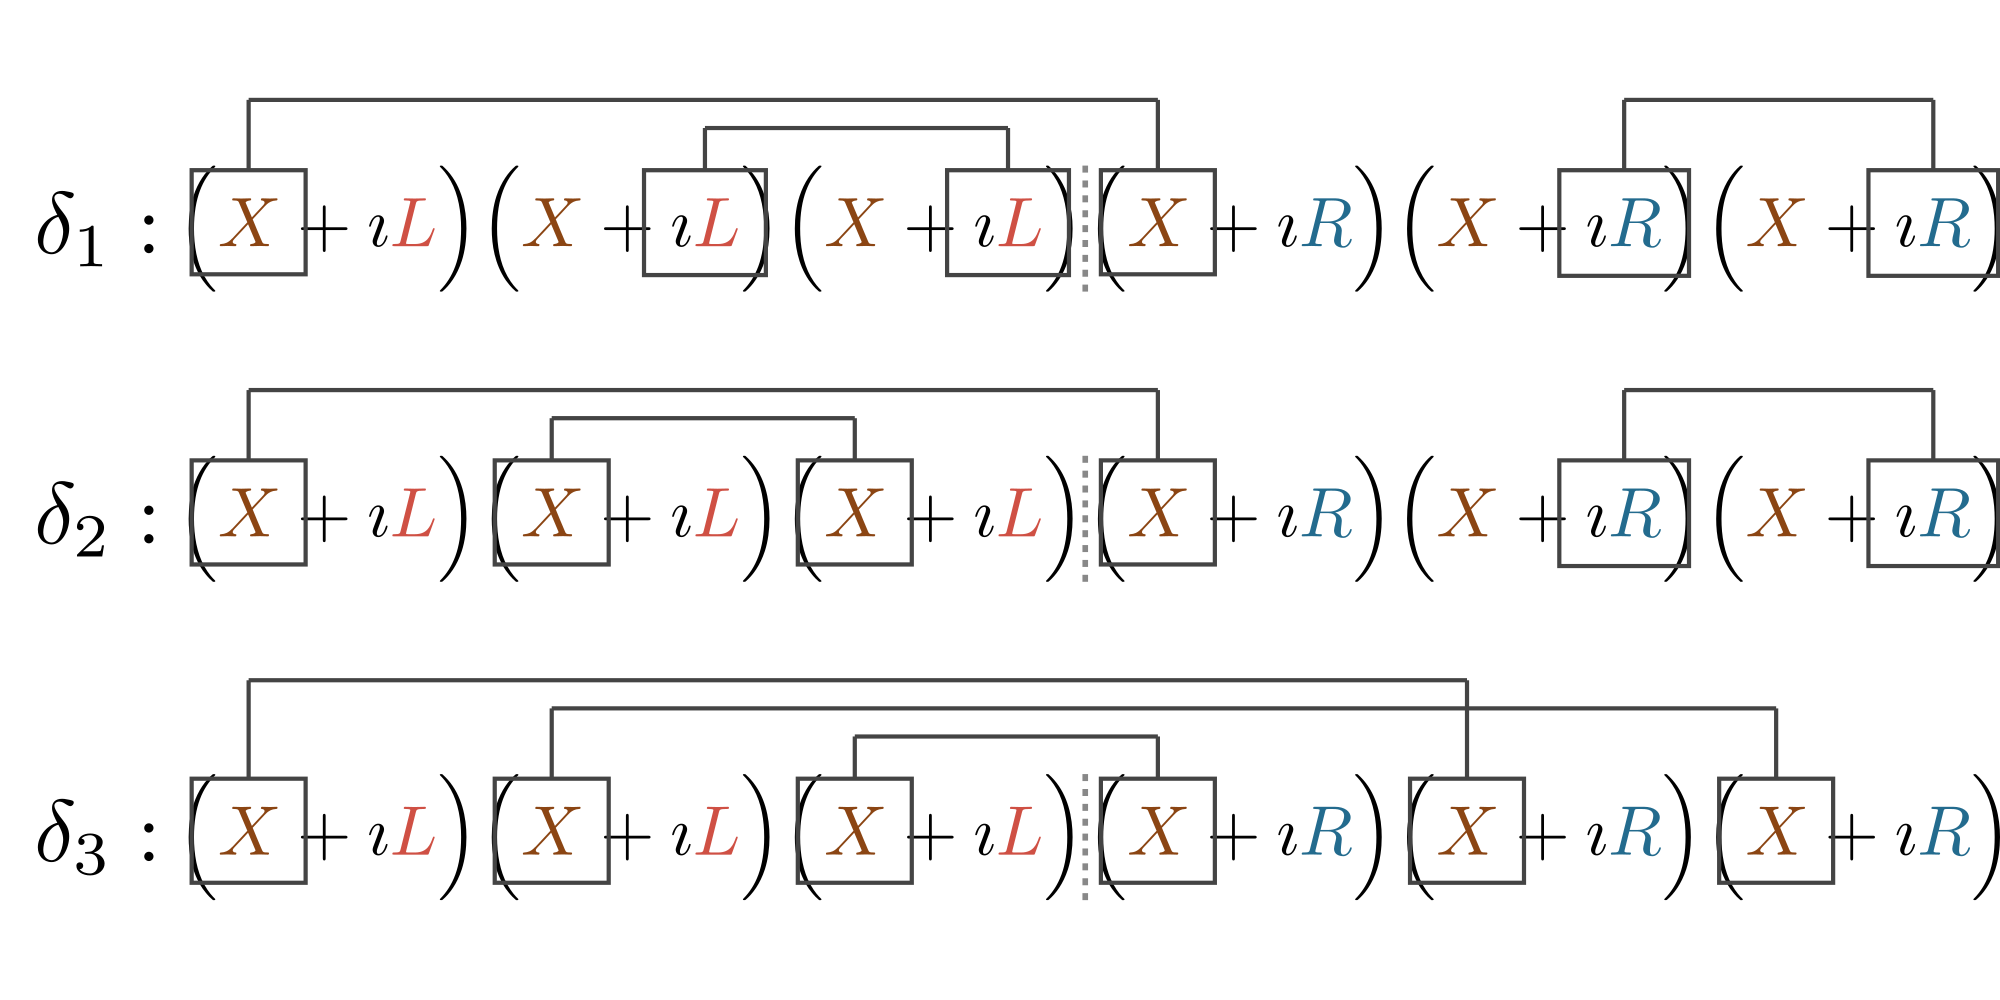

In [63]:
%%manim -r 2000,1000 -v WARNING poly

# -ql

text_color = BLACK
x_color = DARK_BROWN
z_color = PURPLE_E
t_color = BLUE_E
rect_color = GRAY_D
P_COLOR = rect_color
line_stroke_width = 3
rect_stroke_width = 3
fs = 48 #font size
x_rect_buff = 0.2 #.02
x_buff_factor = 2
Z_rect_buff = 0.2
t2cD = {#r"\imath \sqrt{t} Z" : z_color,
    r" t " : t_color,
    r" Z " : z_color,
    r" L " : RED_E,
    r" R " : BLUE_E,
    r" \imath ": BLACK,
    r" x ": x_color, 
    r" X ": x_color
}
print(t2cD)

def PP_lines(start_mob,end_mob,height=0.5,my_dir=UP): 
    #returns a VGroup of 3 objects, which are the lines for the pair partiions
    #my_dir is either UP or DOWN
    if my_dir[1]>0:#check if my_dir is pointing up or down
        start_pt = start_mob.get_top()
        end_pt = end_mob.get_top()
    else:
        start_pt = start_mob.get_bottom()
        end_pt = end_mob.get_bottom()

    p1 = start_pt + my_dir*height
    p2 = end_pt + my_dir*height
    return VGroup(Line(p1,p2,color=P_COLOR,stroke_width=line_stroke_width),
                  Line(start_pt,p1,color=P_COLOR,stroke_width=line_stroke_width),
                  Line(end_pt,p2,color=P_COLOR,stroke_width=line_stroke_width))

def monomial_letters(pattern = ["x","x",1,1], my_height_dict = {},default_height = 0.5):
    n = 6 #len(pattern)
    
    letters = [" L ", " L ", " L ", " R ", " R ", " R "]
    tex_string = " ".join(
        rf"\Big( X + \imath {letter} \Big)" for letter in letters
    )
    print(tex_string)

    mob = MathTex(tex_string,font_size=fs,tex_to_color_map=t2cD,color=text_color)
    print(*enumerate(mob),sep='\n')

    mid_brackets = mob[15] #the brackets seperating left and right sides

    # Get x-coordinate of center of the letter
    x = mid_brackets.get_center()[0]

    # Get vertical span (top and bottom) of the letter
    y_min = mid_brackets.get_bottom()[1]
    y_max = mid_brackets.get_top()[1]

    dotted = DashedLine(
        start=[x, y_min, 0],
        end=[x, y_max, 0],
        color = GREY_C
    )

    
    


    xs = mob.get_parts_by_tex(" X ")
    letter_group = group = VGroup(
           *mob.get_parts_by_tex(r" L "),
           *mob.get_parts_by_tex(r" R ")
    )
    #print(len(letter_group))
    itZs = [VGroup(i,letter) for i,letter in zip(
                        mob.get_parts_by_tex(r" \imath "),
                        letter_group)] 
    #print(len(itZs))

    height_dict = defaultdict(lambda : default_height)
    for key, val in my_height_dict.items():
        height_dict[key] = val


    pattern_mob = VGroup()
    
    ## add in rectangles around the x's
    for ix, item in enumerate(pattern):
        if item == "x":
            rect = SurroundingRectangle(xs[ix],color=rect_color,buff=x_rect_buff,stroke_width=rect_stroke_width)
            #circle = Circle(color=rect_color)
            #circle.surround(xs[ix], buffer_factor=x_buff_factor) #*x_rect_buff)

            pattern_mob.add(rect)

    ## deal with the pairs
    pairs = defaultdict(list)

    for idx, val in enumerate(pattern):
        if val != "x":
            pairs[val].append(idx)  ###a dictionary that stores all the pairs

    # Call PP_lines for each pair
    for key, indices in pairs.items():
        if len(indices) == 2:
            print(key)
            #print("X" in key)
            if "X" in str(key):
                rect_LEFT = SurroundingRectangle(xs[indices[0]],color=rect_color,buff=Z_rect_buff,stroke_width=rect_stroke_width )
                rect_RIGHT = SurroundingRectangle(xs[indices[1]],color=rect_color,buff=Z_rect_buff,stroke_width=rect_stroke_width)
            else:
                rect_LEFT = SurroundingRectangle(itZs[indices[0]],color=rect_color,buff=Z_rect_buff,stroke_width=rect_stroke_width )
                rect_RIGHT = SurroundingRectangle(itZs[indices[1]],color=rect_color,buff=Z_rect_buff,stroke_width=rect_stroke_width)
            line = PP_lines(rect_LEFT,rect_RIGHT, height = height_dict[key])
            pattern_mob.add(rect_LEFT, rect_RIGHT, line)
        else:
            print(f"Warning: Pattern value with unexpected number of occurrences: {indices}")

    #print(*enumerate(mob),sep='\n')
    # Create dotted line at the boundary
    
    return VGroup(mob,pattern_mob,dotted)

def pattern_group( patterns_and_heights ):
    allMobs = VGroup()
    for ix in range(len(patterns_and_heights)):
        pattern = patterns_and_heights[ix][0]
        my_height_dict = patterns_and_heights[ix][1]
        ans = monomial(pattern,my_height_dict=my_height_dict)
        allMobs.add(ans)

    allMobs.arrange(DOWN)
    #if allMobs.height > config.frame_height/3:
    #    allMobs.height = config.frame_height/3
    return(allMobs)



class poly(Scene):
    def construct(self):
        
        alt_height = 0.3
        diagram_1 = monomial_letters(pattern = ["1X",2,2,"1X",3,3], my_height_dict = {"1X":0.5,2:alt_height},default_height = 0.5)
        diagram_2 = monomial_letters(pattern = ["1X","2X","2X","1X",3,3], my_height_dict = {"1X":0.5,"2X":alt_height},default_height = 0.5)
        diagram_3 = monomial_letters(pattern = ["1X","2X","3X","3X","1X","2X"], my_height_dict = {"1X":0.7,"3X":0.3},default_height = 0.5)
        group = VGroup(diagram_1,diagram_2,diagram_3).arrange(DOWN,buff=0.7)
        group.to_edge(RIGHT,buff=0)
        delta_1 = MathTex(r"\delta_1: ",font_size=60,tex_to_color_map=t2cD,color=text_color)
        delta_1.next_to(diagram_1[0],LEFT)
        delta_2 = MathTex(r"\delta_2: ",font_size=60,tex_to_color_map=t2cD,color=text_color)
        delta_2.next_to(diagram_2[0],LEFT)
        delta_3 = MathTex(r"\delta_3: ",font_size=60,tex_to_color_map=t2cD,color=text_color)
        delta_3.next_to(diagram_3[0],LEFT)
        
        #delta_1.align_to(diagram_1,DOWN)
        
        self.add(group,delta_1,delta_2,delta_3)
        